# BigData-Session-3 Solution: Data Wrangling and Visualization

This notebook provides complete solutions for the BigData-session-3 exercises.
It demonstrates advanced data wrangling and visualization techniques.

## 1. Setup and Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.3.3
NumPy version: 2.4.0
Seaborn version: 0.13.2


## 2. Advanced Data Wrangling

In [2]:
# SOLUTION: Create sample dataset with missing values
data = {
    'Date': pd.date_range('2024-01-01', periods=10),
    'Product': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Sales': [100, 150, np.nan, 200, 120, 180, np.nan, 160, 140, 190],
    'Quantity': [10, 15, 12, 20, 12, 18, 14, 16, 14, 19],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print(f"\nMissing values:")
print(df.isnull().sum())

Original DataFrame:
        Date Product  Sales  Quantity Region
0 2024-01-01       A  100.0        10  North
1 2024-01-02       B  150.0        15  South
2 2024-01-03       A    NaN        12   East
3 2024-01-04       C  200.0        20   West
4 2024-01-05       B  120.0        12  North
5 2024-01-06       A  180.0        18  South
6 2024-01-07       C    NaN        14   East
7 2024-01-08       B  160.0        16   West
8 2024-01-09       A  140.0        14  North
9 2024-01-10       C  190.0        19  South

Missing values:
Date        0
Product     0
Sales       2
Quantity    0
Region      0
dtype: int64


In [3]:
# SOLUTION: Handle missing values
print("\n=== HANDLING MISSING VALUES ===")

# Method 1: Drop rows with missing values
df_drop = df.dropna()
print(f"\nAfter dropping NaN rows: {df_drop.shape}")

# Method 2: Fill with mean
df_fill_mean = df.copy()
df_fill_mean['Sales'] = df_fill_mean['Sales'].fillna(df_fill_mean['Sales'].mean())
print(f"\nAfter filling with mean:")
print(df_fill_mean[['Sales']].head())

# Method 3: Forward fill
df_ffill = df.copy()
df_ffill['Sales'] = df_ffill['Sales'].fillna(method='ffill')
print(f"\nAfter forward fill:")
print(df_ffill[['Sales']].head())


=== HANDLING MISSING VALUES ===

After dropping NaN rows: (8, 5)

After filling with mean:
   Sales
0  100.0
1  150.0
2  155.0
3  200.0
4  120.0

After forward fill:
   Sales
0  100.0
1  150.0
2  150.0
3  200.0
4  120.0


/var/folders/h9/rx4h9pp12lg7tlsmq7mld7xw0000gn/T/ipykernel_74793/1292583483.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['Sales'] = df_ffill['Sales'].fillna(method='ffill')


In [4]:
# SOLUTION: Merge and join operations
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Department': ['IT', 'HR', 'IT', 'Finance']
})

df2 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Salary': [50000, 60000, 75000, 55000]
})

print("\n=== MERGE OPERATIONS ===")
print("\nDataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

df_merged = pd.merge(df1, df2, on='ID')
print("\nMerged DataFrame:")
print(df_merged)


=== MERGE OPERATIONS ===

DataFrame 1:
   ID     Name Department
0   1    Alice         IT
1   2      Bob         HR
2   3  Charlie         IT
3   4    David    Finance

DataFrame 2:
   ID  Salary
0   1   50000
1   2   60000
2   3   75000
3   4   55000

Merged DataFrame:
   ID     Name Department  Salary
0   1    Alice         IT   50000
1   2      Bob         HR   60000
2   3  Charlie         IT   75000
3   4    David    Finance   55000


In [5]:
# SOLUTION: Pivot tables
print("\n=== PIVOT TABLES ===")

pivot_table = df.pivot_table(
    values='Sales',
    index='Product',
    columns='Region',
    aggfunc='sum'
)

print("\nPivot Table (Sales by Product and Region):")
print(pivot_table)


=== PIVOT TABLES ===

Pivot Table (Sales by Product and Region):
Region   East  North  South   West
Product                           
A         0.0  240.0  180.0    NaN
B         NaN  120.0  150.0  160.0
C         0.0    NaN  190.0  200.0



=== CORRELATION ANALYSIS ===

Correlation Matrix:
             Sales  Quantity
Sales     1.000000  0.935414
Quantity  0.935414  1.000000


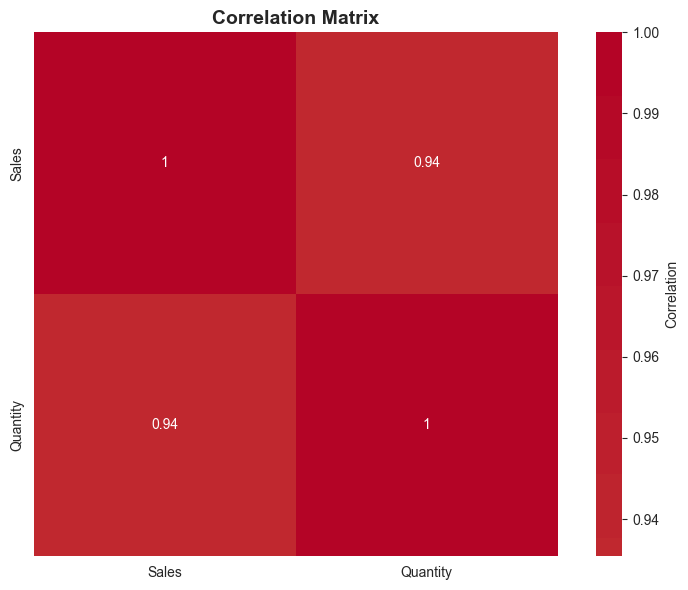

In [6]:
# SOLUTION: Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")

df_numeric = df[['Sales', 'Quantity']].fillna(df[['Sales', 'Quantity']].mean())
corr_matrix = df_numeric.corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Advanced Visualization

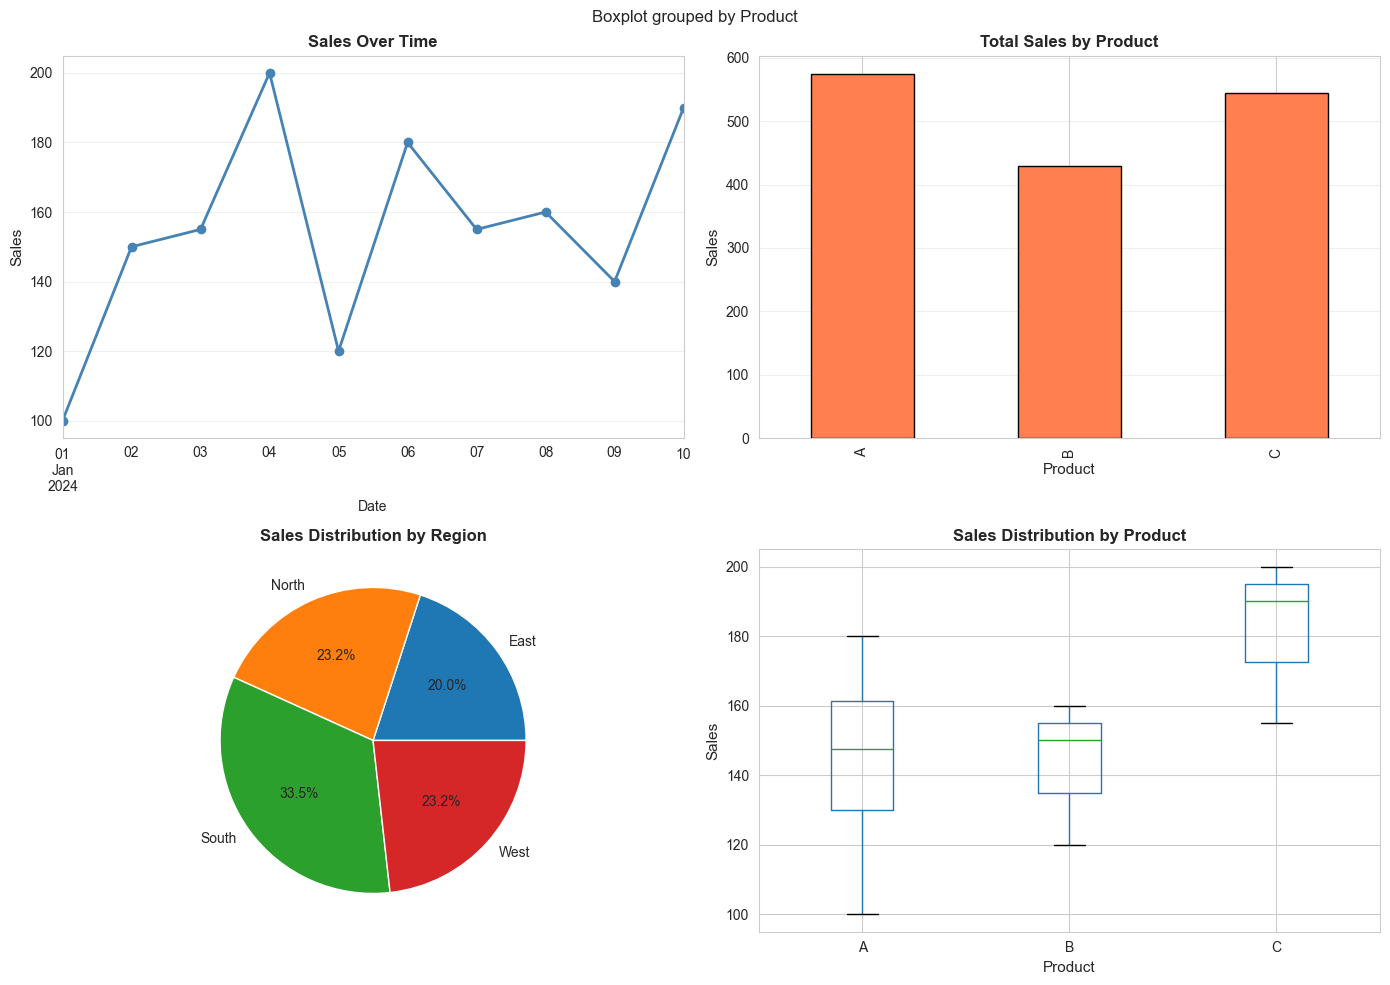

In [7]:
# SOLUTION: Multiple plot types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Line plot
df_fill_mean.set_index('Date')['Sales'].plot(ax=axes[0, 0], marker='o', linewidth=2, color='steelblue')
axes[0, 0].set_title('Sales Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Sales', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Bar plot
df_fill_mean.groupby('Product')['Sales'].sum().plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_title('Total Sales by Product', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Sales', fontsize=11)
axes[0, 1].set_xlabel('Product', fontsize=11)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Pie chart
df_fill_mean.groupby('Region')['Sales'].sum().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%')
axes[1, 0].set_title('Sales Distribution by Region', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('')

# Box plot
df_fill_mean.boxplot(column='Sales', by='Product', ax=axes[1, 1])
axes[1, 1].set_title('Sales Distribution by Product', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Product', fontsize=11)
axes[1, 1].set_ylabel('Sales', fontsize=11)

plt.tight_layout()
plt.show()

/var/folders/h9/rx4h9pp12lg7tlsmq7mld7xw0000gn/T/ipykernel_74793/4104149005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_fill_mean, x='Product', y='Sales', ax=axes[0], palette='Set2')


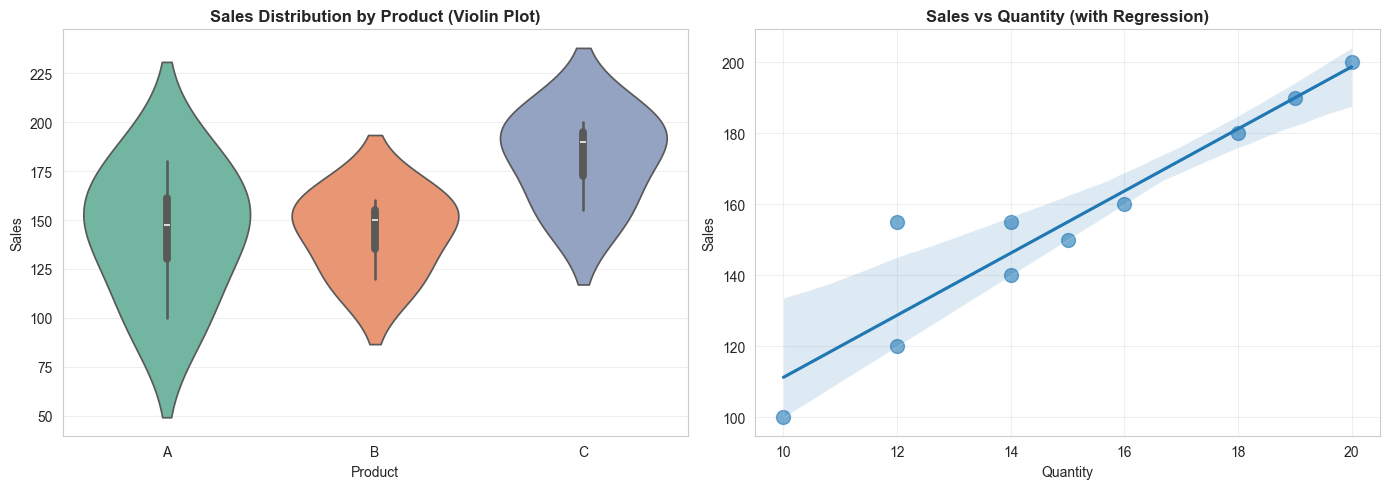

In [8]:
# SOLUTION: Seaborn visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot
sns.violinplot(data=df_fill_mean, x='Product', y='Sales', ax=axes[0], palette='Set2')
axes[0].set_title('Sales Distribution by Product (Violin Plot)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Scatter plot with regression line
sns.regplot(data=df_fill_mean, x='Quantity', y='Sales', ax=axes[1], scatter_kws={'s': 100, 'alpha': 0.6})
axes[1].set_title('Sales vs Quantity (with Regression)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Real Data Analysis Example

In [13]:
# SOLUTION: Load and analyze real dataset
try:
    df_sherlock = pd.read_csv('../sherlock/sherlock_mystery_2apps.csv')
    print(f"Dataset loaded: {df_sherlock.shape}")
    print(f"\nFirst few rows:")
    print(df_sherlock.head())
    print(f"\nColumn names: {df_sherlock.columns.tolist()}")
except FileNotFoundError:
    print("Dataset not found. Using sample data instead.")
    df_sherlock = df

Dataset loaded: (788587, 14)

First few rows:
   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0           0        Facebook       0.20     0.0    0           77   
1           1        WhatsApp       0.12     1.0    0           47   
2           2        Facebook       0.20     0.0    0           77   
3           3        WhatsApp       0.12     1.0    0           47   
4           4        Facebook       0.20     0.0    0           77   

   otherPrivateDirty  priority  utime       vsize  cminflt  guest_time  \
0               5776        20  464.0  2204618752      NaN   17.854415   
1               2852        20  274.0  1992155136      NaN   11.269066   
2               5776        20  464.0  2204618752      NaN   17.854415   
3               2852        20  274.0  1992155136      NaN   11.269066   
4               5764        20  464.0  2204618752      NaN   21.904244   

          Mem  queue  
0  2204618752  100.0  
1  1992155136  100.0  
2  2204618752  100.

In [14]:
# SOLUTION: Comprehensive data analysis
if not df_sherlock.empty and 'ApplicationName' in df_sherlock.columns:
    print("\n=== DATA ANALYSIS ===")
    
    # Basic statistics
    print(f"\nDataset shape: {df_sherlock.shape}")
    print(f"\nMissing values:")
    print(df_sherlock.isnull().sum())
    
    # Application distribution
    print(f"\nApplication distribution:")
    print(df_sherlock['ApplicationName'].value_counts())
    
    # Numeric statistics
    print(f"\nNumeric statistics:")
    print(df_sherlock.describe())


=== DATA ANALYSIS ===

Dataset shape: (788587, 14)

Missing values:
Unnamed: 0                0
ApplicationName           0
CPU_USAGE                 0
cutime                    0
lru                       0
num_threads               0
otherPrivateDirty         0
priority                  0
utime                     0
vsize                     0
cminflt              176473
guest_time                0
Mem                       0
queue                     0
dtype: int64

Application distribution:
ApplicationName
Facebook    481760
WhatsApp    306827
Name: count, dtype: int64

Numeric statistics:
          Unnamed: 0      CPU_USAGE         cutime            lru  \
count  788587.000000  788587.000000  788587.000000  788587.000000   
mean   394293.000000       0.310841       0.436542       0.043118   
std    227645.602702       1.861099       1.002830       0.770883   
min         0.000000       0.000000       0.000000       0.000000   
25%    197146.500000       0.080000       0.000000   

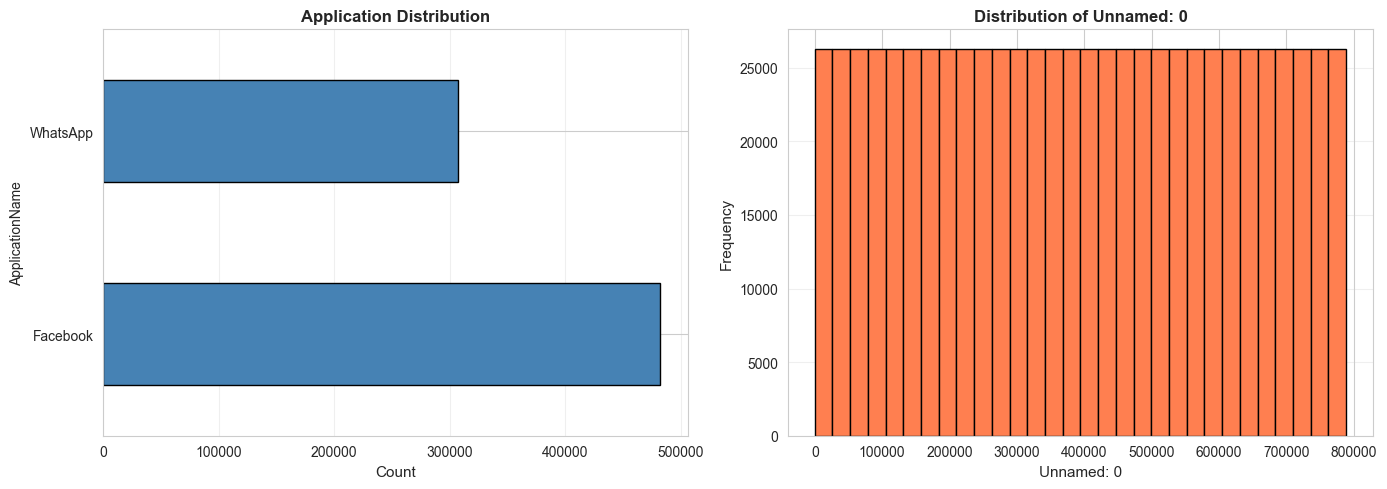

In [15]:
# SOLUTION: Visualize real data
if not df_sherlock.empty and 'ApplicationName' in df_sherlock.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Application distribution
    app_counts = df_sherlock['ApplicationName'].value_counts()
    app_counts.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title('Application Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Count', fontsize=11)
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Numeric feature distribution
    numeric_cols = df_sherlock.select_dtypes(include=[np.number]).columns[:3]
    if len(numeric_cols) > 0:
        df_sherlock[numeric_cols[0]].hist(bins=30, ax=axes[1], edgecolor='black', color='coral')
        axes[1].set_title(f'Distribution of {numeric_cols[0]}', fontsize=12, fontweight='bold')
        axes[1].set_xlabel(numeric_cols[0], fontsize=11)
        axes[1].set_ylabel('Frequency', fontsize=11)
        axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

## 5. Key Concepts Summary

### Data Wrangling:
- **Missing Values**: Drop, fill, or interpolate
- **Merging**: Combine DataFrames using merge/join
- **Pivot Tables**: Reshape data for analysis
- **Grouping**: Aggregate data by categories
- **Correlation**: Analyze relationships between variables

### Visualization Techniques:
- **Line Plots**: Show trends over time
- **Bar Plots**: Compare categories
- **Pie Charts**: Show proportions
- **Box Plots**: Show distributions and outliers
- **Violin Plots**: Show distribution shapes
- **Scatter Plots**: Show relationships
- **Heatmaps**: Show correlations

### Best Practices:
1. Always explore data first (shape, types, missing values)
2. Handle missing values appropriately
3. Use appropriate visualizations for your data
4. Label axes and titles clearly
5. Use consistent color schemes
6. Document your analysis steps